In [152]:
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [154]:
df = pd.read_json('./data/22_01_2023/houses_sell_22_01_2023.json', orient='records') # this dataset has broken rooms num
unwanted_columns = ['id_', 'slug', 'advert_type', 'modified_at', 'description', 'offer_type',
'regular_user', 'seller_id', 'user_type', 'radius', 'owner_name', 'owner_id', 'owner_type', 'phones', 
'all_features', 'extras_types', 'security_types', 'all_medias', 'washing_machine', 'usable_room', 'tv',
'stove', 'separate_kitchen', 'oven', 'furniture', 'fridge', 'dishwasher']
df = df.drop(unwanted_columns, axis=1)
df.head()

,public_id,advertiser_type,created_at,title,url,terrain_area,area,build_year,estate_floors_num,building_material,building_type,construction_status,heating,market_type,price,price_range_min,price_range_max,price_per_m,proper_type,windows_type,latitude,longitude,city,county,province,access_type,fence,roof_type,roofing,location_type,vicinities,air_conditioning,alarm,anti_burglary_door,attic,balcony,basement,closed_area,entryphone,garage,garden,lift,monitoring,pool,roller_shutters,terrace,electricity,gas,internet,phone,sewage,water,heating_2,street,rent,street_number
0,4jVK7,private,2023-01-17 21:00:52,Dom jednorodzinny z piękną działką 800m,https://www.otodom.pl/pl/oferta/dom-jednorodzi...,800.0,151.0,2023.0,one_floor,breezeblock,detached,to_completion,gas,primary,1260000.0,1000001.0,3000000.0,8344.0,house,plastic,52.410340,20.918340,Legionowo,Legionowo,mazowieckie,asphalt,brick,diagonal,sheet,city,forest,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,True,NaN,NaN,NaN,NaN
1,4jZXQ,business,2023-01-21 20:58:54,Oferta ograniczona czasowo !!!,https://www.otodom.pl/pl/oferta/oferta-ogranic...,4958.0,114.0,1986.0,one_floor,breezeblock,detached,ready_to_use,gas,secondary,720000.0,500001.0,750000.0,6316.0,house,plastic,51.198974,22.603993,Lublin,Lublin,lubelskie,asphalt,wire,diagonal,sheet,city,NaN,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,True,NaN,NaN,NaN,NaN
2,4jZXS,business,2023-01-21 21:00:15,Dom pod lasem w Niwkach,https://www.otodom.pl/pl/oferta/dom-pod-lasem-...,800.0,160.0,2022.0,one_floor,NaN,detached,NaN,NaN,primary,875000.0,750001.0,1000000.0,5469.0,house,plastic,50.695428,18.093982,Niwki,Niwki,opolskie,hard_surfaced,NaN,NaN,tile,NaN,NaN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,NaN,NaN,NaN,NaN
3,4jZXX,business,2023-01-21 21:05:22,"Dom przy rzece Świder, 240m2",https://www.otodom.pl/pl/oferta/dom-przy-rzece...,1550.0,240.0,2009.0,two_floors,breezeblock,detached,to_completion,fireplace,secondary,1340000.0,1000001.0,3000000.0,5583.0,house,plastic,52.124393,21.423134,Glinianka,Glinianka,mazowieckie,hard_surfaced,wooden,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,heat_pump,NaN,NaN,NaN
4,4jZYf,business,2023-01-21 21:27:26,"Dom, 135 m², Świerklaniec",https://www.otodom.pl/pl/oferta/dom-135-m-swie...,505.0,135.0,2014.0,one_floor,breezeblock,detached,ready_to_use,gas,secondary,890000.0,750001.0,1000000.0,6593.0,house,plastic,50.441380,18.938540,Świerklaniec,Świerklaniec,śląskie,asphalt,brick,diagonal,tile,suburban,forest,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,NaN,NaN,NaN,NaN


<AxesSubplot: title={'center': 'Ads by location (populatity)'}, xlabel='longitude', ylabel='latitude'>

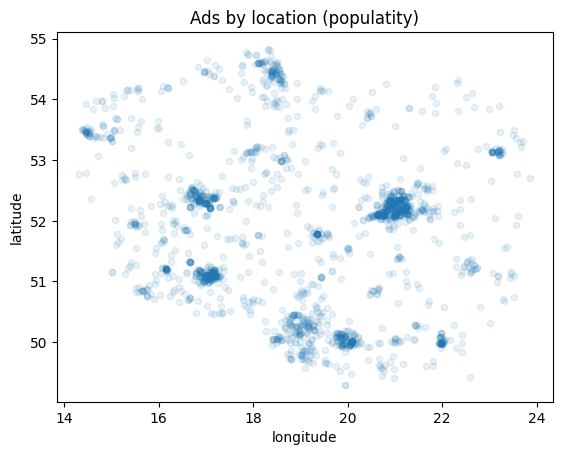

In [155]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, title='Ads by location (populatity)')

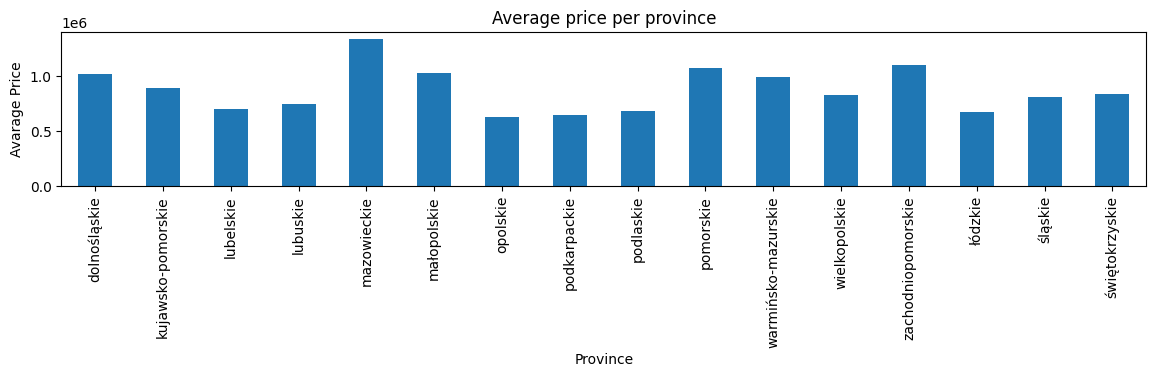

In [156]:
avg_price_per_province = df.groupby(by=['province']).mean('price')
avg_price_per_province['price']
ax = avg_price_per_province['price'].plot(kind='bar', figsize=(14,2), title="Average price per province")
ax.set_xlabel("Province")
ax.set_ylabel("Avarage Price")
plt.show()

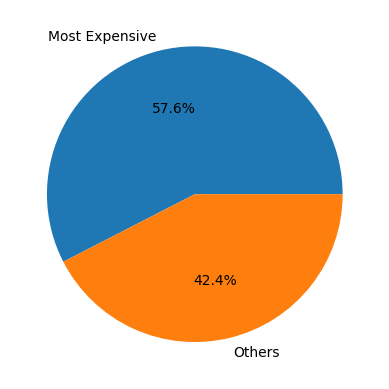

In [157]:
most_expensive_provinces = list(avg_price_per_province.sort_values(by='price', ascending=False)[:5].index)
tops_df = df.loc[df['province'].isin(most_expensive_provinces)]
not_tops_df = df.loc[~df['province'].isin(most_expensive_provinces)]

labels = 'Most Expensive', 'Others'
sizes = [len(tops_df), len(not_tops_df)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',)
plt.show()

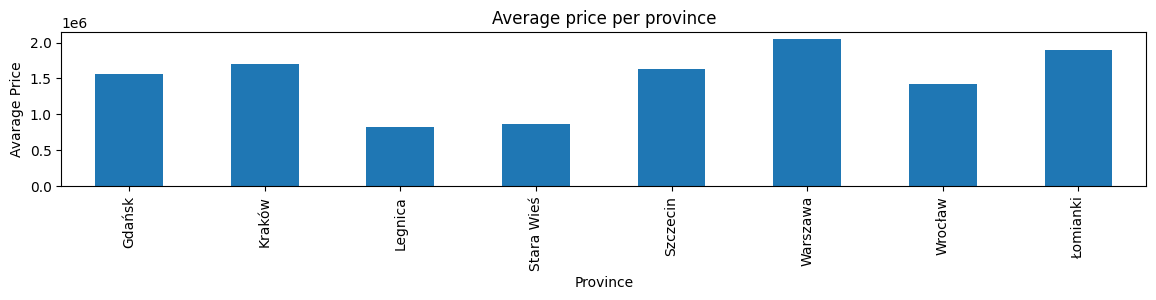

In [158]:
top_cities = list(tops_df['city'].value_counts().keys()[:8])
top_cities_df = tops_df.loc[df['city'].isin(top_cities)]
len(top_cities_df)
avg_price_per_city = top_cities_df.groupby(by=['city']).mean('price')
ax = avg_price_per_city['price'].plot(kind='bar', figsize=(14,2), title="Average price per province")
ax.set_xlabel("Province")
ax.set_ylabel("Avarage Price")
plt.show()

In [159]:
cracow_houses = top_cities_df[top_cities_df['city'] == 'Kraków'].sort_values(by='price')
cracow_houses = cracow_houses[cracow_houses['construction_status'] == 'ready_to_use']
cracow_houses

,public_id,advertiser_type,created_at,title,url,terrain_area,area,build_year,estate_floors_num,building_material,building_type,construction_status,heating,market_type,price,price_range_min,price_range_max,price_per_m,proper_type,windows_type,latitude,longitude,city,county,province,access_type,fence,roof_type,roofing,location_type,vicinities,air_conditioning,alarm,anti_burglary_door,attic,balcony,basement,closed_area,entryphone,garage,garden,lift,monitoring,pool,roller_shutters,terrace,electricity,gas,internet,phone,sewage,water,heating_2,street,rent,street_number
947,4jXj7,business,2023-01-18 14:15:47,Dom Podgórze Rybitwy Zmodernizowany W 2016 Roku,https://www.otodom.pl/pl/oferta/dom-podgorze-r...,499.0,198.0,2016.0,one_floor,NaN,detached,ready_to_use,NaN,secondary,1350000.0,1000001.0,3000000.0,6818.0,house,plastic,50.046999,20.023484,Kraków,Kraków,małopolskie,NaN,NaN,NaN,sheet,NaN,NaN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,False,NaN,ul. Golikówka,NaN,NaN
1667,4jZvo,business,2023-01-20 17:45:33,Atrakcyjny wolnostojący dom - Kraków Swoszowice,https://www.otodom.pl/pl/oferta/atrakcyjny-wol...,600.0,120.0,2014.0,NaN,NaN,detached,ready_to_use,NaN,secondary,1399000.0,1000001.0,3000000.0,11658.0,house,plastic,49.994704,19.946330,Kraków,Kraków,małopolskie,asphalt,NaN,NaN,sheet,NaN,NaN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,True,NaN,Swoszowice,NaN,NaN
1801,4jZSQ,business,2023-01-21 16:38:00,Mieszkanie w zabudowie bliźniaczej z ogródkiem,https://www.otodom.pl/pl/oferta/mieszkanie-w-z...,150.0,157.0,2009.0,one_floor,breezeblock,semi_detached,ready_to_use,gas,secondary,1490000.0,1000001.0,3000000.0,9490.0,house,plastic,50.088295,19.943362,Kraków,Kraków,małopolskie,asphalt,metal,diagonal,NaN,city,NaN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,True,True,NaN,ul. Zdrowa,NaN,NaN
202,4jV9w,private,2023-01-17 12:54:39,"Sprzedam Dom, Grębałów",https://www.otodom.pl/pl/oferta/sprzedam-dom-g...,19000.0,150.0,2019.0,one_floor,breezeblock,detached,ready_to_use,gas,secondary,1600000.0,1000001.0,3000000.0,10667.0,house,plastic,50.096400,20.083410,Kraków,Kraków,małopolskie,hard_surfaced,NaN,diagonal,tile,city,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,NaN,NaN,NaN,NaN
1320,4jYKd,business,2023-01-19 21:35:06,Przytulny bliźniak w centrum Krakowa,https://www.otodom.pl/pl/oferta/przytulny-bliz...,300.0,196.0,1970.0,more,brick,semi_detached,ready_to_use,gas,secondary,1800000.0,1000001.0,3000000.0,9184.0,house,plastic,50.078183,19.970397,Kraków,Kraków,małopolskie,asphalt,wooden,NaN,tile,NaN,NaN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,True,NaN,ul. Mieszka I,NaN,I
893,4jXaA,business,2023-01-18 12:52:32,Budynek inwestycyjny na Olszy,https://www.otodom.pl/pl/oferta/budynek-inwest...,484.0,250.0,NaN,more,brick,semi_detached,ready_to_use,NaN,secondary,1850000.0,1000001.0,3000000.0,7400.0,house,plastic,50.076340,19.975030,Kraków,Kraków,małopolskie,asphalt,NaN,NaN,sheet,NaN,NaN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,True,NaN,ul. Kazimierza Chałupnika,NaN,NaN
1842,4jZYX,private,2023-01-21 22:11:56,Dom jednorodzinny na Piaskach Starych,https://www.otodom.pl/pl/oferta/dom-jednorodzi...,1650.0,100.0,NaN,two_floors,wood,detached,ready_to_use,gas,secondary,2300000.0,1000001.0,3000000.0,23000.0,house,plastic,50.075670,19.930840,Kraków,Kraków,małopolskie,asphalt,metal,diagonal,sheet,city,NaN,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,True,False,True,True,True,NaN,NaN,NaN,NaN
1503,4jZ9l,business,2023-01-20 12:56:44,Piękna Rezydencja Z Domkiem Dla Gości! Swoszow...,https://www.ot

In [168]:
my_house = cracow_houses[cracow_houses['public_id'] == '4jXaA']
pd.set_option('display.max_colwidth', None)
print(my_house['url'])

893    https://www.otodom.pl/pl/oferta/budynek-inwestycyjny-na-olszy-ID4jXaA
Name: url, dtype: object


C:\Users\dariu\AppData\Local\Temp\ipykernel_13768\728898567.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 3, idx, title=key)


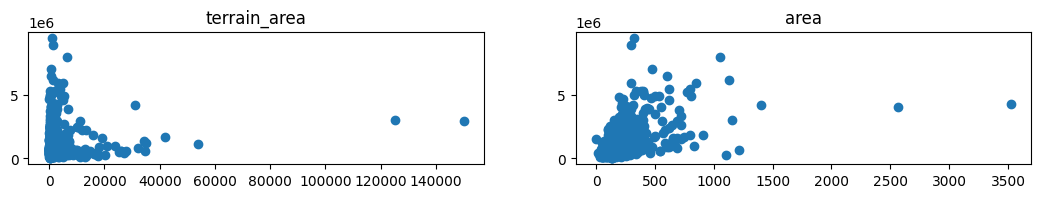

In [160]:
floats = [key for key, column in df.items() if column.dtype == float]
plt.subplots(1, 2, figsize=(20, 10))
for idx, key in enumerate(['terrain_area', 'area'], 1):
    plt.subplot(5, 3, idx, title=key)
    plt.scatter(df[key], df['price'])